# Airline passengers dataset

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.optim as optim
import torch.utils.data as data

In [ ]:
df = pd.read_csv('/content/airline-passengers.csv')

timeseries = df[["Passengers"]].values.astype('float32')

train_size = int(len(timeseries) * 0.67)
test_size = len(timeseries) - train_size
train, test = timeseries[:train_size], timeseries[train_size:]

def create_dataset(dataset, lookback):
    X, y = [], []
    for i in range(len(dataset)-lookback):
        feature = dataset[i:i+lookback]
        target = dataset[i+1:i+lookback+1]
        X.append(feature)
        y.append(target)
    return torch.tensor(X), torch.tensor(y)

In [ ]:
lookback = 4
X_train, y_train = create_dataset(train, lookback=lookback)
X_test, y_test = create_dataset(test, lookback=lookback)

In [ ]:
class RNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.rnn = nn.RNN(input_size=1, hidden_size=50, num_layers=1, batch_first=True)
        self.linear = nn.Linear(50, 1)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.linear(out)
        return out

Epoch 0: train RMSE 223.8506, test RMSE 423.0002
Epoch 100: train RMSE 170.6525, test RMSE 367.0612
Epoch 200: train RMSE 127.3308, test RMSE 318.9515
Epoch 300: train RMSE 95.3095, test RMSE 278.4590
Epoch 400: train RMSE 71.6003, test RMSE 243.7987
Epoch 500: train RMSE 54.3620, test RMSE 213.4067
Epoch 600: train RMSE 42.2461, test RMSE 187.0457
Epoch 700: train RMSE 34.8575, test RMSE 165.3872
Epoch 800: train RMSE 30.1380, test RMSE 147.6912
Epoch 900: train RMSE 26.8250, test RMSE 134.0620
Epoch 1000: train RMSE 24.8624, test RMSE 125.0614
Epoch 1100: train RMSE 23.5162, test RMSE 118.2209
Epoch 1200: train RMSE 22.4123, test RMSE 109.9666
Epoch 1300: train RMSE 22.2543, test RMSE 105.2387
Epoch 1400: train RMSE 20.7883, test RMSE 101.9764
Epoch 1500: train RMSE 20.1727, test RMSE 99.9117
Epoch 1600: train RMSE 20.0450, test RMSE 96.3177
Epoch 1700: train RMSE 19.3341, test RMSE 94.1435
Epoch 1800: train RMSE 19.3070, test RMSE 92.0713
Epoch 1900: train RMSE 18.8635, test RMSE 92

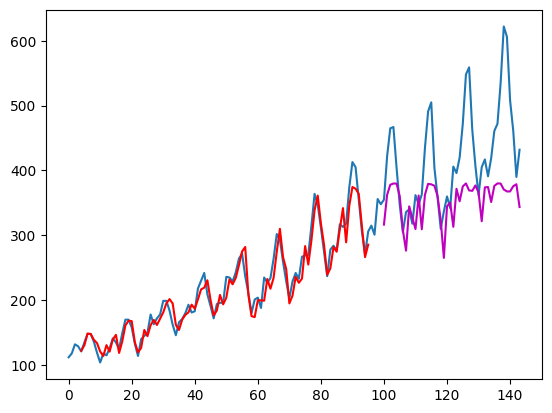

In [ ]:
model = RNN()
optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()

loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=8)

n_epochs = 2000
for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if epoch % 100 != 0:
        continue
    model.eval()
    with torch.no_grad():
        y_pred = model(X_train)
        train_rmse = np.sqrt(loss_fn(y_pred, y_train))
        y_pred = model(X_test)
        test_rmse = np.sqrt(loss_fn(y_pred, y_test))
    print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))

with torch.no_grad():
    train_plot = np.ones_like(timeseries) * np.nan
    y_pred = model(X_train)
    y_pred = y_pred[:, -1, :]
    train_plot[lookback:train_size] = model(X_train)[:, -1, :]
    test_plot = np.ones_like(timeseries) * np.nan
    test_plot[train_size+lookback:len(timeseries)] = model(X_test)[:, -1, :]
plt.plot(timeseries)
plt.plot(train_plot, c='r')
plt.plot(test_plot, c='m')
plt.show()

In [ ]:
class LSTM(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=50, num_layers=1, batch_first=True)
        self.linear = nn.Linear(50, 1)

    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.linear(x)
        return x

Epoch 0: train RMSE 225.6846, test RMSE 424.9329
Epoch 100: train RMSE 175.6741, test RMSE 372.4102
Epoch 200: train RMSE 138.6151, test RMSE 331.7130
Epoch 300: train RMSE 108.7992, test RMSE 295.9124
Epoch 400: train RMSE 87.6252, test RMSE 265.4482
Epoch 500: train RMSE 65.9562, test RMSE 232.6092
Epoch 600: train RMSE 51.4361, test RMSE 204.3225
Epoch 700: train RMSE 41.4876, test RMSE 180.2634
Epoch 800: train RMSE 34.5282, test RMSE 159.5260
Epoch 900: train RMSE 29.8309, test RMSE 141.3021
Epoch 1000: train RMSE 26.6651, test RMSE 126.8932
Epoch 1100: train RMSE 24.5708, test RMSE 114.8896
Epoch 1200: train RMSE 23.1615, test RMSE 105.9653
Epoch 1300: train RMSE 22.3113, test RMSE 97.7269
Epoch 1400: train RMSE 21.3618, test RMSE 91.8896
Epoch 1500: train RMSE 21.5215, test RMSE 86.5784
Epoch 1600: train RMSE 21.3740, test RMSE 84.4898
Epoch 1700: train RMSE 20.1090, test RMSE 80.7623
Epoch 1800: train RMSE 19.8491, test RMSE 78.1225
Epoch 1900: train RMSE 19.7829, test RMSE 76.

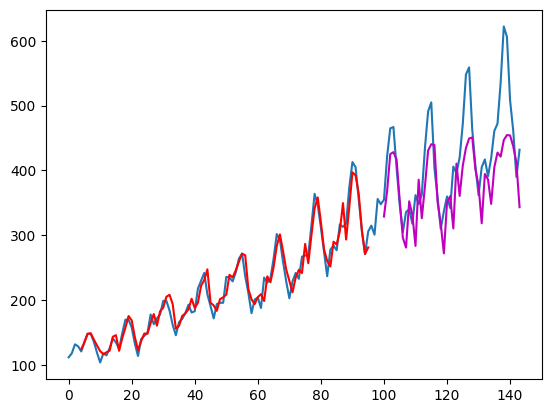

In [ ]:
model = LSTM()
optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()

loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=8)

n_epochs = 2000
for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if epoch % 100 != 0:
        continue
    model.eval()
    with torch.no_grad():
        y_pred = model(X_train)
        train_rmse = np.sqrt(loss_fn(y_pred, y_train))
        y_pred = model(X_test)
        test_rmse = np.sqrt(loss_fn(y_pred, y_test))
    print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))

with torch.no_grad():
    train_plot = np.ones_like(timeseries) * np.nan
    y_pred = model(X_train)
    y_pred = y_pred[:, -1, :]
    train_plot[lookback:train_size] = model(X_train)[:, -1, :]
    test_plot = np.ones_like(timeseries) * np.nan
    test_plot[train_size+lookback:len(timeseries)] = model(X_test)[:, -1, :]
plt.plot(timeseries)
plt.plot(train_plot, c='r')
plt.plot(test_plot, c='m')
plt.show()

In [ ]:
class GRU(nn.Module):
    def __init__(self):
        super().__init__()
        self.gru = nn.GRU(input_size=1, hidden_size=50, num_layers=1, batch_first=True)
        self.linear = nn.Linear(50, 1)

    def forward(self, x):
        x, _ = self.gru(x)
        x = self.linear(x)
        return x

Epoch 0: train RMSE 225.9815, test RMSE 425.2123
Epoch 100: train RMSE 176.0008, test RMSE 372.7862
Epoch 200: train RMSE 135.4256, test RMSE 328.2721
Epoch 300: train RMSE 103.5578, test RMSE 289.7477
Epoch 400: train RMSE 79.2568, test RMSE 255.9093
Epoch 500: train RMSE 57.5648, test RMSE 219.9460
Epoch 600: train RMSE 43.9141, test RMSE 191.8236
Epoch 700: train RMSE 35.3133, test RMSE 168.6708
Epoch 800: train RMSE 29.3482, test RMSE 148.6156
Epoch 900: train RMSE 25.9312, test RMSE 132.0727
Epoch 1000: train RMSE 22.9549, test RMSE 118.9618
Epoch 1100: train RMSE 21.8283, test RMSE 108.6318
Epoch 1200: train RMSE 20.2522, test RMSE 100.7136
Epoch 1300: train RMSE 20.0488, test RMSE 95.2559
Epoch 1400: train RMSE 19.5816, test RMSE 90.9789
Epoch 1500: train RMSE 19.2802, test RMSE 87.6526
Epoch 1600: train RMSE 18.8936, test RMSE 86.1381
Epoch 1700: train RMSE 18.8435, test RMSE 85.1321
Epoch 1800: train RMSE 18.7376, test RMSE 83.3123
Epoch 1900: train RMSE 18.5339, test RMSE 82.

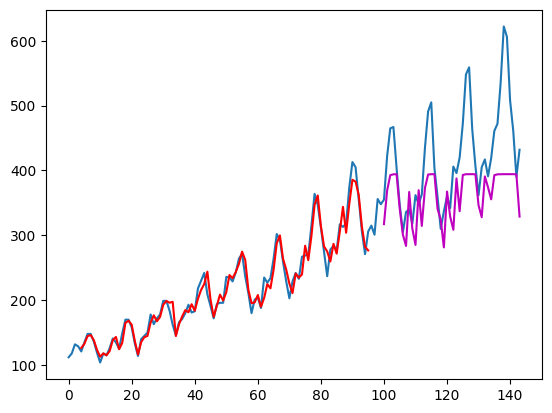

In [ ]:
model = GRU()
optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()

loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=8)

n_epochs = 2000
for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if epoch % 100 != 0:
        continue
    model.eval()
    with torch.no_grad():
        y_pred = model(X_train)
        train_rmse = np.sqrt(loss_fn(y_pred, y_train))
        y_pred = model(X_test)
        test_rmse = np.sqrt(loss_fn(y_pred, y_test))
    print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))

with torch.no_grad():
    train_plot = np.ones_like(timeseries) * np.nan
    y_pred = model(X_train)
    y_pred = y_pred[:, -1, :]
    train_plot[lookback:train_size] = model(X_train)[:, -1, :]
    test_plot = np.ones_like(timeseries) * np.nan
    test_plot[train_size+lookback:len(timeseries)] = model(X_test)[:, -1, :]
plt.plot(timeseries)
plt.plot(train_plot, c='r')
plt.plot(test_plot, c='m')
plt.show()

**Wnioski:** W przypadku prostych szeregów czasowych do wytrenowania sieci rekurencyjnych wystarczy prosta sieć tego typu z jedną warstwą rekurencyjną i jedną liniową. Najważniejszym parametrem jest tutaj liczba iteracji, którą można zwiększać, ulepszając tym samym modele.

# Yfinance dataset

## Preparation

In [ ]:
import math
import numpy as np
import torch
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf
from datetime import date, timedelta, datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [ ]:
def create_dataset(dataset, lookback):
    X, y = [], []
    for i in range(len(dataset)-lookback):
        feature = dataset[i:i+lookback]
        target = dataset[i+1:i+lookback+1]
        X.append(feature)
        y.append(target)
    return torch.tensor(X), torch.tensor(y)

In [ ]:
def train_plot(model, optimizer, loss_fn, timeseries, n_epochs, lookback, xlim=None):
    train_size = int(len(timeseries) * 0.8)
    test_size = len(timeseries) - train_size
    train, test = timeseries[:train_size], timeseries[train_size:]
    X_train, y_train = create_dataset(train, lookback=lookback)
    X_test, y_test = create_dataset(test, lookback=lookback)
    loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=8)
    for epoch in range(n_epochs):
        model.train()
        for X_batch, y_batch in loader:
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        if epoch % 1 != 0:
            continue
        model.eval()
        with torch.no_grad():
            y_pred = model(X_train)
            train_rmse = np.sqrt(loss_fn(y_pred, y_train))
            y_pred = model(X_test)
            test_rmse = np.sqrt(loss_fn(y_pred, y_test))
        print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))

    with torch.no_grad():
        train_plot = np.ones_like(timeseries) * np.nan
        y_pred = model(X_train)
        y_pred = y_pred[:, -1, :]
        train_plot[lookback:train_size] = model(X_train)[:, -1, :]
        test_plot = np.ones_like(timeseries) * np.nan
        test_plot[train_size+lookback:len(timeseries)] = model(X_test)[:, -1, :]
    plt.figure(figsize=(10,6))
    plt.plot(timeseries)
    plt.plot(train_plot, c='r')
    plt.plot(test_plot, c='m')
    if xlim != None:
        plt.xlim(xlim[0], xlim[1])
    plt.show()

## AAPL

In [ ]:
end_date =  date.today().strftime("%Y-%m-%d")
start_date = '1990-01-01'
df = yf.download('AAPL', start=start_date, end=end_date)

timeseries = df[["Open"]].values.astype('float32')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
class RNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.rnn = nn.RNN(input_size=1, hidden_size=200, num_layers=1, batch_first=True)
        self.dropout = nn.Dropout(0.5)
        self.linear1 = nn.Linear(200, 200)
        self.linear2 = nn.Linear(200, 1)
        self.relu = nn.LeakyReLU()

    def forward(self, x):
        x, _ = self.rnn(x)
        x = self.dropout(x)
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x

Epoch 0: train RMSE 0.4063, test RMSE 82.2217
Epoch 1: train RMSE 0.4454, test RMSE 79.8179
Epoch 2: train RMSE 0.2900, test RMSE 77.8248
Epoch 3: train RMSE 0.5074, test RMSE 76.4356
Epoch 4: train RMSE 0.5276, test RMSE 74.6398
Epoch 5: train RMSE 0.4183, test RMSE 77.1949
Epoch 6: train RMSE 0.4588, test RMSE 73.1055
Epoch 7: train RMSE 0.3062, test RMSE 70.8929
Epoch 8: train RMSE 0.3918, test RMSE 68.6573
Epoch 9: train RMSE 0.4648, test RMSE 67.8508
Epoch 10: train RMSE 0.3719, test RMSE 65.9489
Epoch 11: train RMSE 0.5222, test RMSE 65.4001
Epoch 12: train RMSE 0.3412, test RMSE 62.1609
Epoch 13: train RMSE 0.7602, test RMSE 63.4194
Epoch 14: train RMSE 0.3114, test RMSE 59.5857
Epoch 15: train RMSE 0.3491, test RMSE 58.7268
Epoch 16: train RMSE 0.3814, test RMSE 58.7172
Epoch 17: train RMSE 0.3805, test RMSE 64.6402
Epoch 18: train RMSE 0.4625, test RMSE 62.3418
Epoch 19: train RMSE 0.5557, test RMSE 59.4986
Epoch 20: train RMSE 0.5965, test RMSE 60.9699
Epoch 21: train RMSE 0.

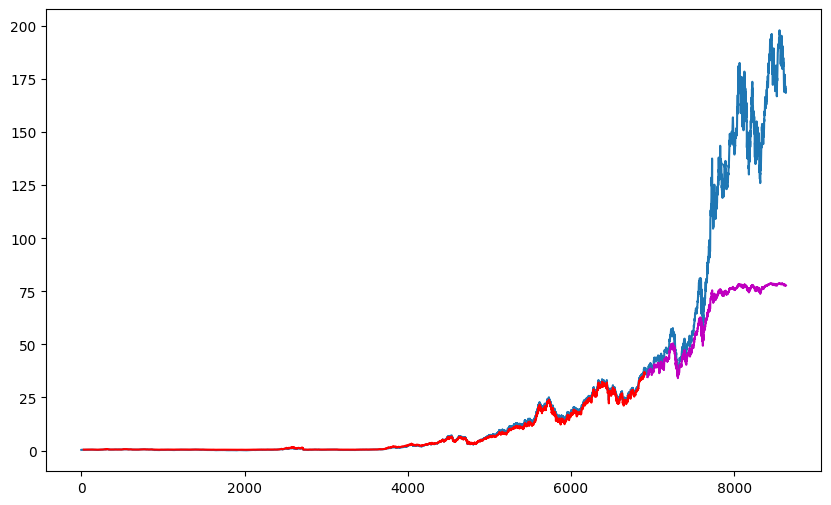

In [ ]:
model = RNN()
optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()

train_plot(model, optimizer, loss_fn, timeseries, n_epochs=30, lookback=30, xlim=None)

In [ ]:
class LSTM(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=200, num_layers=1, batch_first=True)
        self.dropout = nn.Dropout(0.5)
        self.linear1 = nn.Linear(200, 200)
        self.linear2 = nn.Linear(200, 1)
        self.relu = nn.LeakyReLU()

    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.dropout(x)
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x

Epoch 0: train RMSE 0.3112, test RMSE 79.7716
Epoch 1: train RMSE 0.4990, test RMSE 76.6818
Epoch 2: train RMSE 0.2865, test RMSE 72.9752
Epoch 3: train RMSE 0.2356, test RMSE 70.0833
Epoch 4: train RMSE 0.2500, test RMSE 68.6935
Epoch 5: train RMSE 0.2778, test RMSE 63.8192
Epoch 6: train RMSE 0.3411, test RMSE 61.3875
Epoch 7: train RMSE 0.5113, test RMSE 59.2320
Epoch 8: train RMSE 0.5993, test RMSE 54.5283
Epoch 9: train RMSE 0.7088, test RMSE 57.7264
Epoch 10: train RMSE 0.8466, test RMSE 53.7341
Epoch 11: train RMSE 0.9719, test RMSE 51.0676
Epoch 12: train RMSE 1.0153, test RMSE 50.0280
Epoch 13: train RMSE 1.0296, test RMSE 50.4984
Epoch 14: train RMSE 1.0833, test RMSE 49.2083


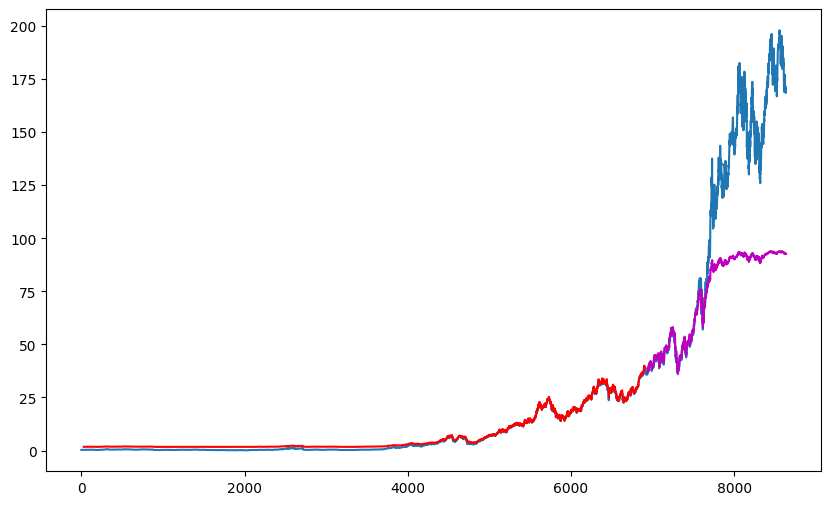

In [ ]:
model = LSTM()
optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()

train_plot(model, optimizer, loss_fn, timeseries, n_epochs=15, lookback=30, xlim=None)

In [ ]:
class GRU(nn.Module):
    def __init__(self):
        super().__init__()
        self.gru = nn.GRU(input_size=1, hidden_size=50, num_layers=1, batch_first=True)
        self.dropout = nn.Dropout(0.5)
        self.linear1 = nn.Linear(50, 50)
        self.linear2 = nn.Linear(50, 1)
        self.relu = nn.LeakyReLU()

    def forward(self, x):
        x, _ = self.gru(x)
        x = self.dropout(x)
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x

Epoch 0: train RMSE 0.4736, test RMSE 87.2517
Epoch 1: train RMSE 0.6783, test RMSE 83.2803
Epoch 2: train RMSE 0.5570, test RMSE 79.7453
Epoch 3: train RMSE 0.4760, test RMSE 76.0899
Epoch 4: train RMSE 0.4281, test RMSE 74.3025
Epoch 5: train RMSE 0.3882, test RMSE 73.6208
Epoch 6: train RMSE 0.4181, test RMSE 74.1052
Epoch 7: train RMSE 0.4928, test RMSE 73.0490
Epoch 8: train RMSE 0.4950, test RMSE 76.0708
Epoch 9: train RMSE 0.4561, test RMSE 73.0735
Epoch 10: train RMSE 0.4980, test RMSE 78.0514
Epoch 11: train RMSE 0.5962, test RMSE 76.3643
Epoch 12: train RMSE 0.6307, test RMSE 71.5364
Epoch 13: train RMSE 0.6423, test RMSE 73.0299
Epoch 14: train RMSE 0.7669, test RMSE 71.3506
Epoch 15: train RMSE 0.7992, test RMSE 72.6462
Epoch 16: train RMSE 0.7398, test RMSE 72.7585
Epoch 17: train RMSE 0.7770, test RMSE 73.6653
Epoch 18: train RMSE 0.7453, test RMSE 73.1424
Epoch 19: train RMSE 0.7516, test RMSE 74.0051
Epoch 20: train RMSE 0.7610, test RMSE 73.4556
Epoch 21: train RMSE 0.

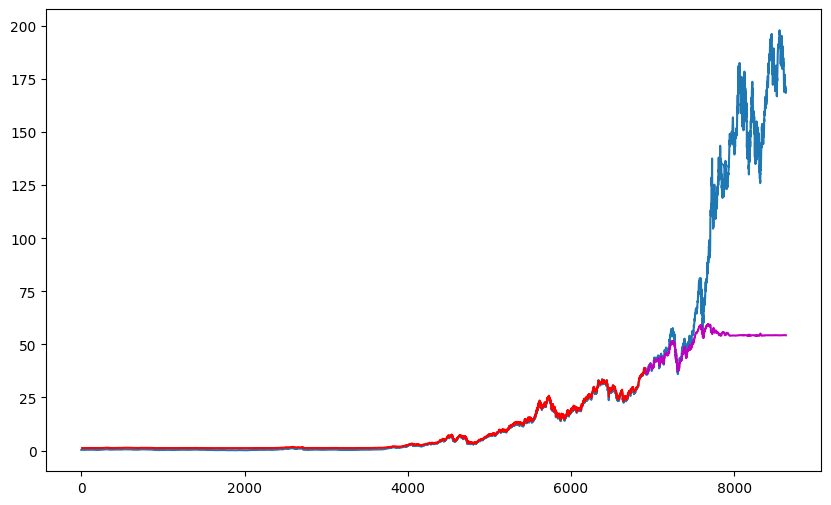

In [ ]:
model = GRU()
optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()

train_plot(model, optimizer, loss_fn, timeseries, n_epochs=30, lookback=10, xlim=None)

## GOOG

In [ ]:
end_date =  date.today().strftime("%Y-%m-%d")
start_date = '1990-01-01'
df = yf.download('GOOG', start=start_date, end=end_date)

timeseries = df[["Open"]].values.astype('float32')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
class RNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.rnn = nn.RNN(input_size=1, hidden_size=100, num_layers=1, batch_first=True)
        self.dropout = nn.Dropout(0.5)
        self.linear1 = nn.Linear(100, 100)
        self.linear2 = nn.Linear(100, 100)
        self.linear3 = nn.Linear(100, 1)
        self.relu = nn.LeakyReLU()

    def forward(self, x):
        x, _ = self.rnn(x)
        x = self.dropout(x)
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        x = self.relu(x)
        x = self.linear3(x)
        return x

Epoch 0: train RMSE 1.3270, test RMSE 41.1948
Epoch 1: train RMSE 1.4308, test RMSE 32.6300
Epoch 2: train RMSE 0.9754, test RMSE 30.6679
Epoch 3: train RMSE 0.7321, test RMSE 26.5303
Epoch 4: train RMSE 0.7445, test RMSE 24.0925
Epoch 5: train RMSE 1.1326, test RMSE 23.4138
Epoch 6: train RMSE 0.6942, test RMSE 22.0092
Epoch 7: train RMSE 1.0106, test RMSE 18.9502
Epoch 8: train RMSE 0.7779, test RMSE 22.6690
Epoch 9: train RMSE 0.7173, test RMSE 19.9722
Epoch 10: train RMSE 1.9524, test RMSE 15.9154
Epoch 11: train RMSE 0.9748, test RMSE 17.9861
Epoch 12: train RMSE 1.8847, test RMSE 22.3484
Epoch 13: train RMSE 0.8733, test RMSE 21.6990
Epoch 14: train RMSE 0.7809, test RMSE 21.8341


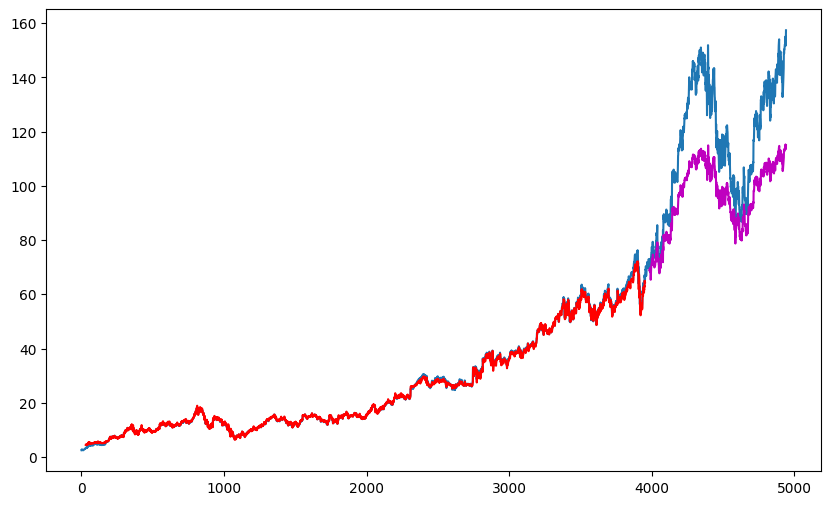

In [ ]:
model = RNN()
optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()

train_plot(model, optimizer, loss_fn, timeseries, n_epochs=15, lookback=30, xlim=None)

In [ ]:
class LSTM(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=100, num_layers=1, batch_first=True)
        self.dropout = nn.Dropout(0.5)
        self.linear1 = nn.Linear(100, 100)
        self.linear2 = nn.Linear(100, 100)
        self.linear3 = nn.Linear(100, 1)
        self.relu = nn.LeakyReLU()

    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.dropout(x)
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        x = self.relu(x)
        x = self.linear3(x)
        return x

Epoch 0: train RMSE 1.7443, test RMSE 37.8155
Epoch 1: train RMSE 0.8748, test RMSE 29.6932
Epoch 2: train RMSE 0.7241, test RMSE 21.1424
Epoch 3: train RMSE 0.6455, test RMSE 15.7129
Epoch 4: train RMSE 0.7211, test RMSE 16.1455
Epoch 5: train RMSE 0.6431, test RMSE 13.2106
Epoch 6: train RMSE 0.7448, test RMSE 11.7874
Epoch 7: train RMSE 1.9973, test RMSE 7.7257
Epoch 8: train RMSE 0.7770, test RMSE 12.1113
Epoch 9: train RMSE 0.6913, test RMSE 8.3364
Epoch 10: train RMSE 0.9875, test RMSE 13.2672
Epoch 11: train RMSE 1.2245, test RMSE 13.8923
Epoch 12: train RMSE 0.8376, test RMSE 9.1794
Epoch 13: train RMSE 0.8537, test RMSE 11.5653
Epoch 14: train RMSE 0.9615, test RMSE 14.8622


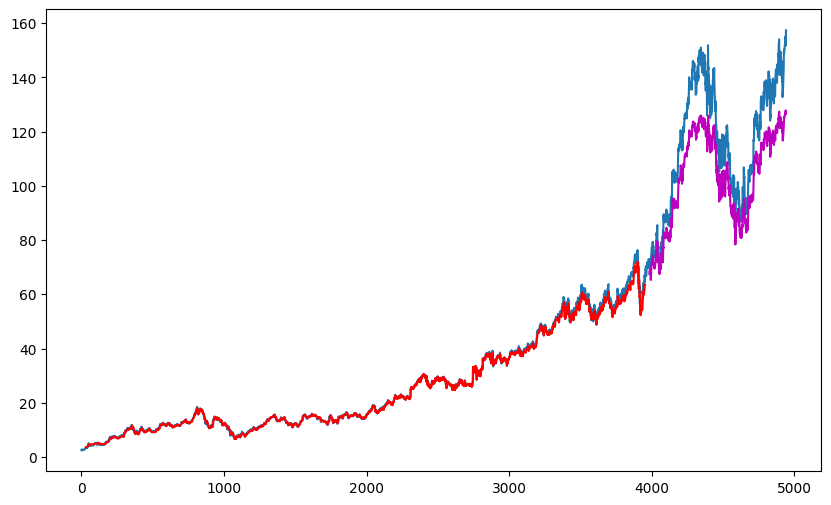

In [ ]:
model = LSTM()
optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()

train_plot(model, optimizer, loss_fn, timeseries, n_epochs=15, lookback=30, xlim=None)

In [ ]:
class GRU(nn.Module):
    def __init__(self):
        super().__init__()
        self.gru = nn.GRU(input_size=1, hidden_size=50, num_layers=1, batch_first=True)
        self.dropout = nn.Dropout(0.5)
        self.linear1 = nn.Linear(50, 50)
        self.linear2 = nn.Linear(50, 50)
        self.linear3 = nn.Linear(50, 1)
        self.relu = nn.LeakyReLU()

    def forward(self, x):
        x, _ = self.gru(x)
        x = self.dropout(x)
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        x = self.relu(x)
        x = self.linear3(x)
        return x

Epoch 0: train RMSE 1.5650, test RMSE 40.0286
Epoch 1: train RMSE 1.1844, test RMSE 28.2489
Epoch 2: train RMSE 0.6656, test RMSE 16.1167
Epoch 3: train RMSE 0.6903, test RMSE 14.3218


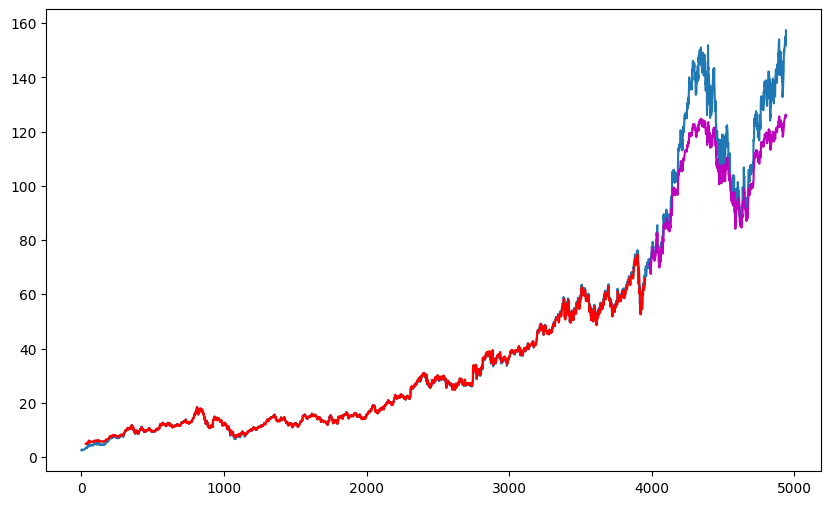

In [ ]:
model = GRU()
optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()

train_plot(model, optimizer, loss_fn, timeseries, n_epochs=4, lookback=30, xlim=None)

In [ ]:
class GRU(nn.Module):
    def __init__(self):
        super().__init__()
        self.gru = nn.GRU(input_size=1, hidden_size=50, num_layers=1, batch_first=True)
        self.dropout = nn.Dropout(0.5)
        self.linear1 = nn.Linear(50, 71)
        self.linear2 = nn.Linear(71, 1)
        self.relu = nn.LeakyReLU()

    def forward(self, x):
        x, _ = self.gru(x)
        x = self.dropout(x)
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x

Epoch 0: train RMSE 1.4987, test RMSE 51.6694
Epoch 1: train RMSE 0.9562, test RMSE 44.9434
Epoch 2: train RMSE 1.0347, test RMSE 39.6421
Epoch 3: train RMSE 0.6790, test RMSE 34.6283
Epoch 4: train RMSE 0.6018, test RMSE 29.9058
Epoch 5: train RMSE 0.7404, test RMSE 25.9391
Epoch 6: train RMSE 0.9172, test RMSE 21.5722
Epoch 7: train RMSE 0.6930, test RMSE 21.2410
Epoch 8: train RMSE 0.6995, test RMSE 19.3852
Epoch 9: train RMSE 0.7892, test RMSE 19.2086
Epoch 10: train RMSE 0.8067, test RMSE 18.6428
Epoch 11: train RMSE 0.7789, test RMSE 15.8709
Epoch 12: train RMSE 0.8177, test RMSE 17.5715
Epoch 13: train RMSE 0.8701, test RMSE 16.9425
Epoch 14: train RMSE 0.8562, test RMSE 18.8853


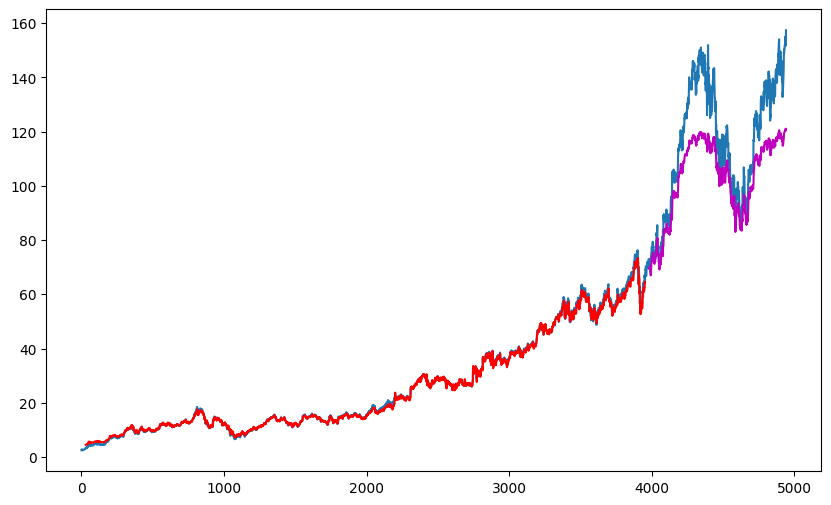

In [ ]:
model = GRU()
optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()

train_plot(model, optimizer, loss_fn, timeseries, n_epochs=15, lookback=30, xlim=None)

## AMZN

In [ ]:
end_date =  date.today().strftime("%Y-%m-%d")
start_date = '1990-01-01'
df = yf.download('AMZN', start=start_date, end=end_date)

timeseries = df[["Open"]].values.astype('float32')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
class RNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.rnn = nn.RNN(input_size=1, hidden_size=50, num_layers=1, batch_first=True)
        self.dropout = nn.Dropout(0.5)
        self.linear1 = nn.Linear(50, 50)
        self.linear2 = nn.Linear(50, 1)
        self.relu = nn.LeakyReLU()

    def forward(self, x):
        x, _ = self.rnn(x)
        x = self.dropout(x)
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x

Epoch 0: train RMSE 1.6404, test RMSE 50.6355
Epoch 1: train RMSE 1.3180, test RMSE 42.7495
Epoch 2: train RMSE 1.3142, test RMSE 40.2322
Epoch 3: train RMSE 1.1070, test RMSE 37.7053
Epoch 4: train RMSE 1.2803, test RMSE 37.1416
Epoch 5: train RMSE 1.8369, test RMSE 36.8079
Epoch 6: train RMSE 1.8153, test RMSE 33.2497
Epoch 7: train RMSE 1.8904, test RMSE 34.7758
Epoch 8: train RMSE 0.9185, test RMSE 34.5050
Epoch 9: train RMSE 1.6116, test RMSE 36.1452
Epoch 10: train RMSE 0.8469, test RMSE 33.8484
Epoch 11: train RMSE 1.4375, test RMSE 32.9646
Epoch 12: train RMSE 0.7447, test RMSE 33.9404
Epoch 13: train RMSE 1.0737, test RMSE 35.7346
Epoch 14: train RMSE 1.2098, test RMSE 33.3337


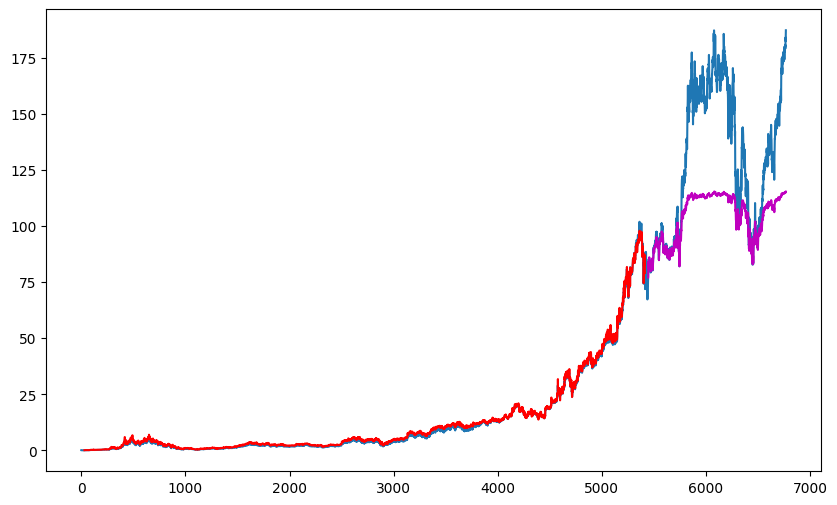

In [ ]:
model = RNN()
optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()

train_plot(model, optimizer, loss_fn, timeseries, n_epochs=15, lookback=30, xlim=None)

In [ ]:
class RNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.rnn = nn.RNN(input_size=1, hidden_size=50, num_layers=2, batch_first=True)
        self.dropout = nn.Dropout(0.5)
        self.linear1 = nn.Linear(50, 50)
        self.linear2 = nn.Linear(50, 1)
        self.relu = nn.LeakyReLU()

    def forward(self, x):
        x, _ = self.rnn(x)
        x = self.dropout(x)
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x

Epoch 0: train RMSE 1.5054, test RMSE 50.0592
Epoch 1: train RMSE 1.2449, test RMSE 42.8914
Epoch 2: train RMSE 1.2033, test RMSE 39.9552
Epoch 3: train RMSE 0.9751, test RMSE 38.4643
Epoch 4: train RMSE 0.8617, test RMSE 37.1725
Epoch 5: train RMSE 1.3380, test RMSE 37.7878
Epoch 6: train RMSE 1.0864, test RMSE 37.8096
Epoch 7: train RMSE 0.9671, test RMSE 35.0416
Epoch 8: train RMSE 1.1161, test RMSE 37.0172
Epoch 9: train RMSE 0.9934, test RMSE 35.9276
Epoch 10: train RMSE 1.5958, test RMSE 39.7279
Epoch 11: train RMSE 0.9016, test RMSE 35.0692
Epoch 12: train RMSE 1.4177, test RMSE 40.5263
Epoch 13: train RMSE 0.8212, test RMSE 35.8941
Epoch 14: train RMSE 0.7687, test RMSE 33.4210


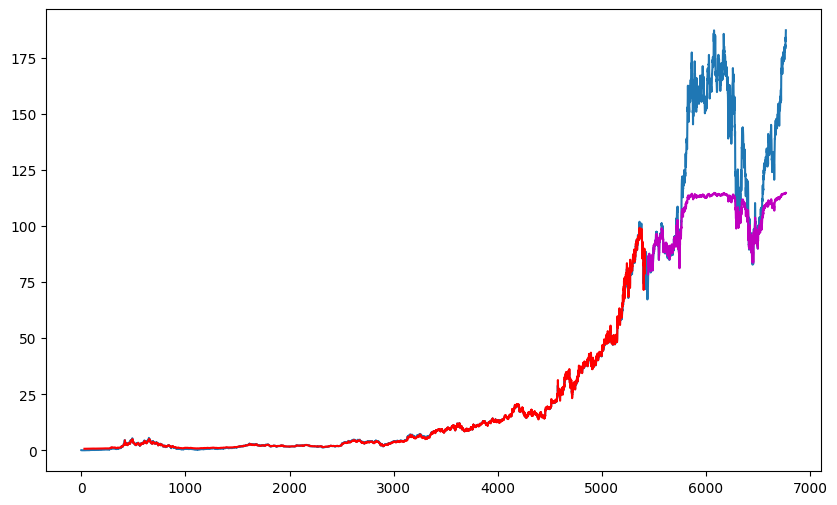

In [ ]:
model = RNN()
optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()

train_plot(model, optimizer, loss_fn, timeseries, n_epochs=15, lookback=30, xlim=None)

In [ ]:
class LSTM(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=200, num_layers=1, batch_first=True)
        self.dropout = nn.Dropout(0.5)
        self.linear1 = nn.Linear(200, 200)
        self.linear2 = nn.Linear(200, 1)
        self.relu = nn.LeakyReLU()

    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.dropout(x)
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x

<ipython-input-7-5ab0e8de4918>:8: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:275.)
  return torch.tensor(X), torch.tensor(y)


Epoch 0: train RMSE 1.0463, test RMSE 36.1708
Epoch 1: train RMSE 0.8853, test RMSE 34.9891
Epoch 2: train RMSE 1.5601, test RMSE 30.7826
Epoch 3: train RMSE 0.5677, test RMSE 26.7106
Epoch 4: train RMSE 0.5257, test RMSE 26.3108
Epoch 5: train RMSE 0.5435, test RMSE 25.6545
Epoch 6: train RMSE 0.9715, test RMSE 27.3716
Epoch 7: train RMSE 0.6038, test RMSE 26.4121
Epoch 8: train RMSE 0.4985, test RMSE 24.7721
Epoch 9: train RMSE 0.6124, test RMSE 25.4281
Epoch 10: train RMSE 0.6960, test RMSE 24.9685
Epoch 11: train RMSE 0.6445, test RMSE 21.4950
Epoch 12: train RMSE 0.6997, test RMSE 20.2981
Epoch 13: train RMSE 1.0109, test RMSE 17.6099
Epoch 14: train RMSE 0.7691, test RMSE 20.3970


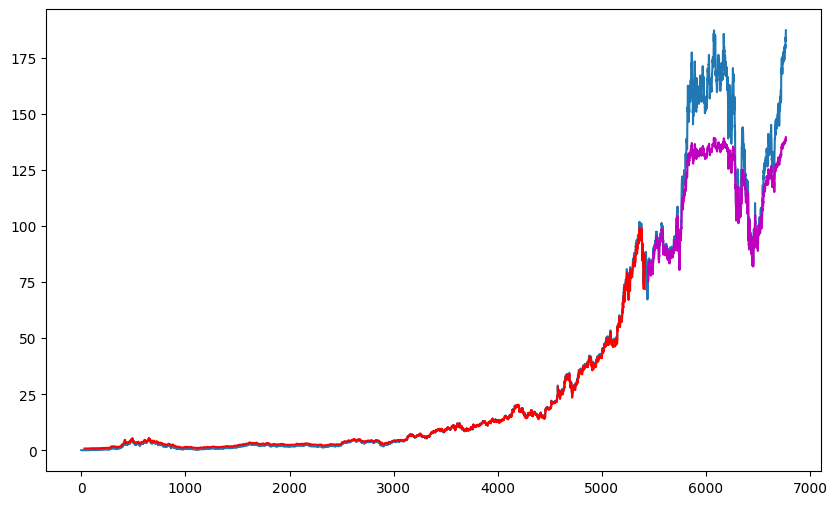

In [ ]:
model = LSTM()
optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()

train_plot(model, optimizer, loss_fn, timeseries, n_epochs=15, lookback=30, xlim=None)

In [ ]:
class GRU(nn.Module):
    def __init__(self):
        super().__init__()
        self.gru = nn.GRU(input_size=1, hidden_size=200, num_layers=1, batch_first=True)
        self.dropout = nn.Dropout(0.5)
        self.linear1 = nn.Linear(200, 200)
        self.linear2 = nn.Linear(200, 1)
        self.relu = nn.LeakyReLU()

    def forward(self, x):
        x, _ = self.gru(x)
        x = self.dropout(x)
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x

Epoch 0: train RMSE 0.6940, test RMSE 36.1006
Epoch 1: train RMSE 0.5624, test RMSE 32.4940
Epoch 2: train RMSE 0.5153, test RMSE 30.7055
Epoch 3: train RMSE 0.5844, test RMSE 31.0339
Epoch 4: train RMSE 0.7329, test RMSE 31.3417
Epoch 5: train RMSE 0.5816, test RMSE 30.3395
Epoch 6: train RMSE 0.7689, test RMSE 29.1923
Epoch 7: train RMSE 0.9177, test RMSE 30.0274
Epoch 8: train RMSE 0.5247, test RMSE 27.3349
Epoch 9: train RMSE 0.4983, test RMSE 24.4828
Epoch 10: train RMSE 0.9984, test RMSE 23.5008
Epoch 11: train RMSE 0.6942, test RMSE 26.8506
Epoch 12: train RMSE 0.6070, test RMSE 23.7608
Epoch 13: train RMSE 0.6698, test RMSE 23.7228
Epoch 14: train RMSE 0.5912, test RMSE 24.5620


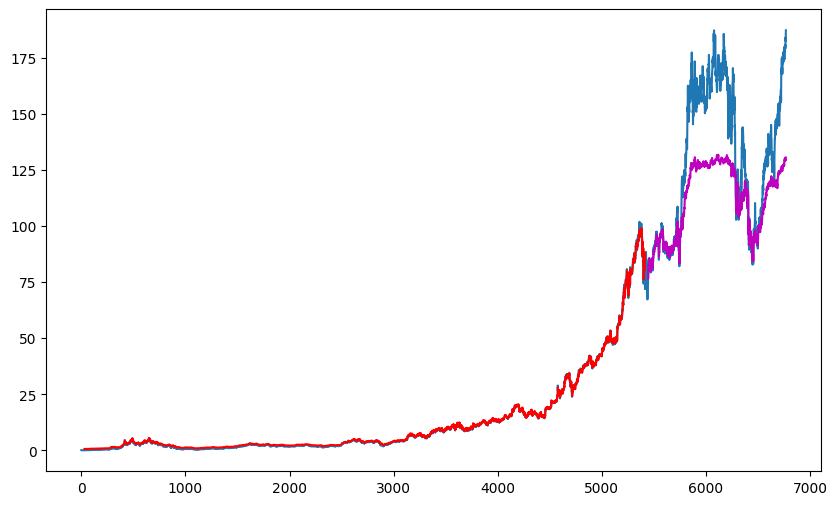

In [ ]:
model = GRU()
optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()

train_plot(model, optimizer, loss_fn, timeseries, n_epochs=15, lookback=30, xlim=None)